**Load dữ liệu và kiểm tra info của dataset**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43824 entries, 2010-01-01 00:00:00 to 2014-12-31 23:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   43824 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.3 MB


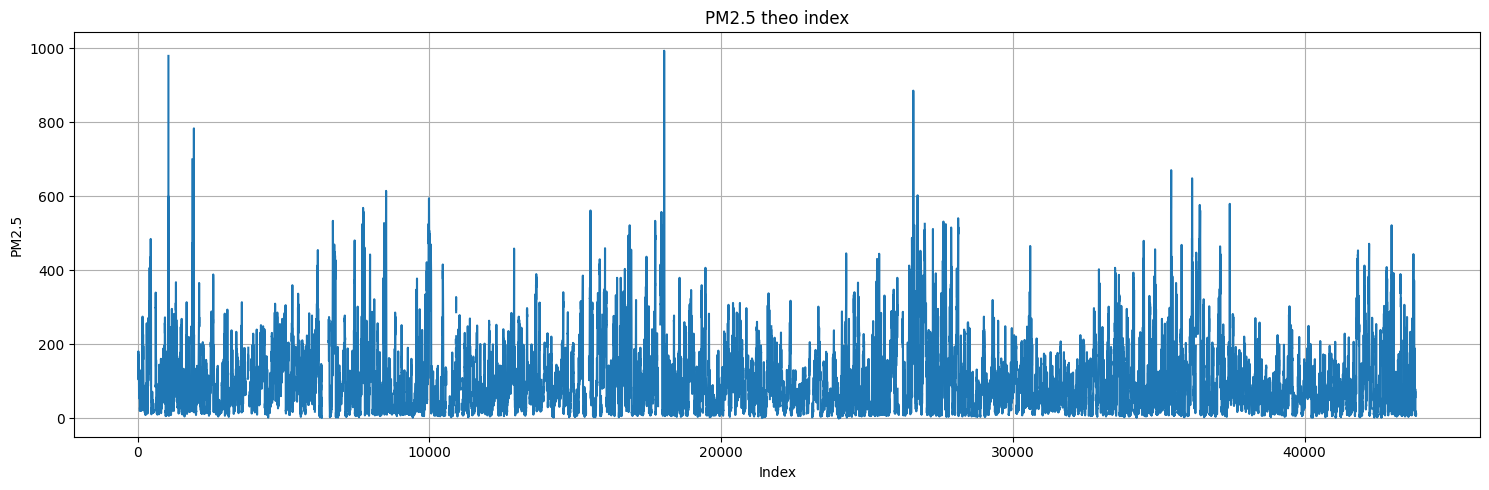

In [43]:
plt.figure(figsize=(15, 5))
df['pm2.5'].plot()
plt.title('PM2.5 theo index')
plt.xlabel('Index')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

**Tiền xử lí dữ liệu:**
- Chuyển các cột ghi thời gian về chung 1 cột date
- Điền dữ liệu thiếu của cột pm2.5 bằng mean


In [51]:
df = df[['No', 'year', 'month', 'day', 'hour', 'pm2.5']]

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)

df['pm2.5'].fillna(df['pm2.5'].mean(), inplace=True)

C:\Users\MinhHuong\AppData\Local\Temp\ipykernel_17820\3508085083.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2.5'].fillna(df['pm2.5'].mean(), inplace=True)


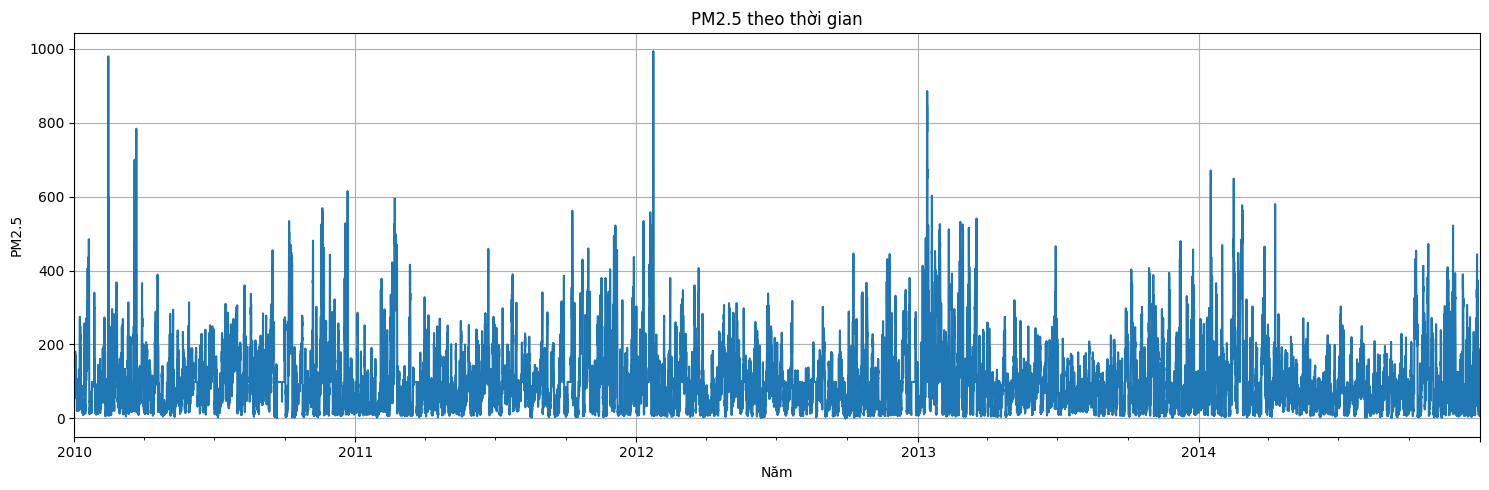

In [53]:
plt.figure(figsize=(15, 5))
df['pm2.5'].plot()
plt.title('PM2.5 theo thời gian')
plt.xlabel('Năm')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

**Dùng kiểm định ADF test xem chuỗi có dừng không?** Nếu không thì sai phân
cho tới khi dừng

In [56]:
from statsmodels.tsa.stattools import adfuller

current_series = df['pm2.5'].diff()
current_series = current_series.diff()

result = adfuller(current_series.dropna())
result

(-51.99649403334132,
 0.0,
 55,
 43766,
 {'1%': -3.4304994238354247,
  '5%': -2.861606042059194,
  '10%': -2.566805152039991},
 408889.2099334781)

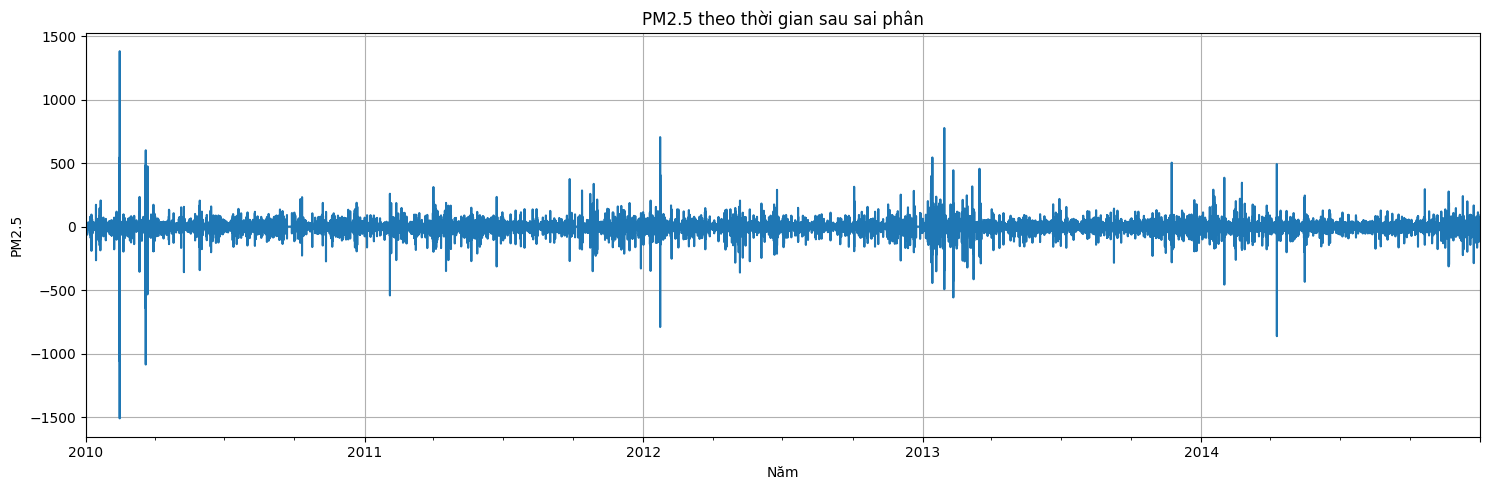

In [57]:
plt.figure(figsize=(15, 5))
current_series.plot()
plt.title('PM2.5 theo thời gian sau sai phân')
plt.xlabel('Năm')
plt.ylabel('PM2.5')
plt.grid(True)
plt.tight_layout()
plt.show()

Vẽ biểu đồ ACF/PACF để lựa chọn tham số p và q cho ARIMA

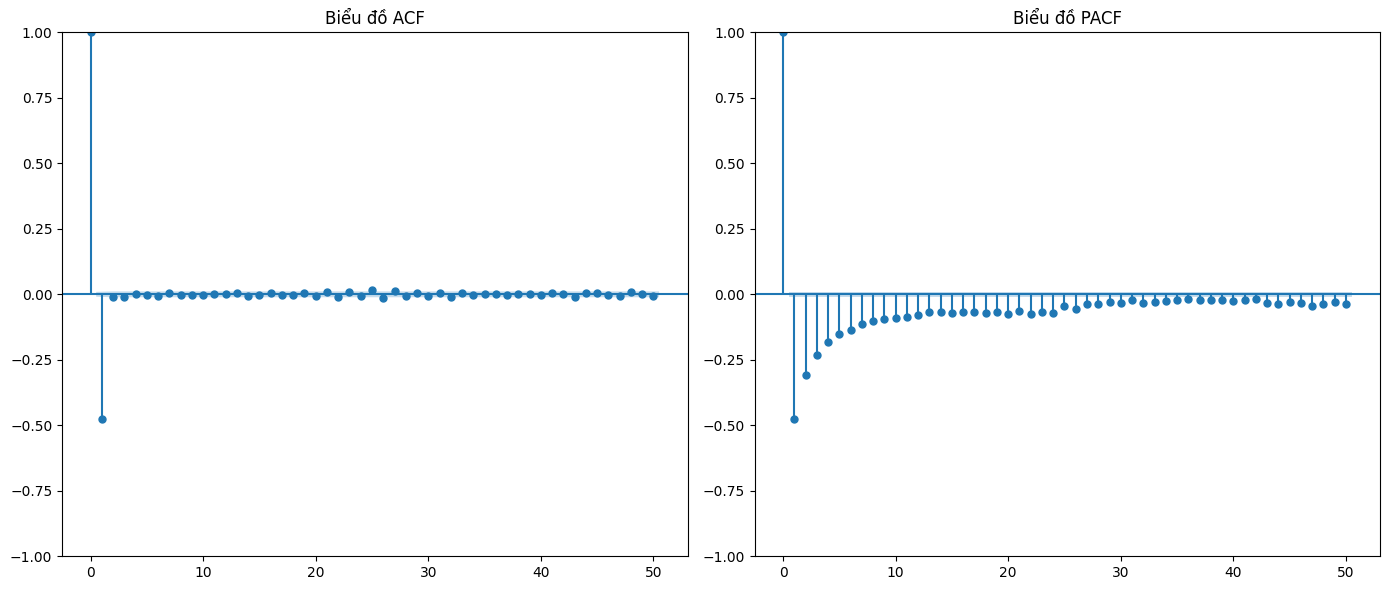

In [59]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(14, 6))


plt.subplot(1, 2, 1)
plot_acf(current_series.dropna(), lags=50, ax=plt.gca())
plt.title("Biểu đồ ACF")


plt.subplot(1, 2, 2)
plot_pacf(current_series.dropna(), lags=50, ax=plt.gca(), method='ywm')
plt.title("Biểu đồ PACF")

plt.tight_layout()
plt.show()

**Xây dựng mô hình ARIMA**

c:\Users\MinhHuong\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\MinhHuong\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
c:\Users\MinhHuong\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  pm2.5   No. Observations:                43824
Model:                 ARIMA(2, 2, 1)   Log Likelihood             -204442.193
Date:                Tue, 03 Jun 2025   AIC                         408892.386
Time:                        15:28:33   BIC                         408927.138
Sample:                    01-01-2010   HQIC                        408903.339
                         - 12-31-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0522      0.001     54.932      0.000       0.050       0.054
ar.L2          0.0053      0.001      6.088      0.000       0.004       0.007
ma.L1         -1.0000      0.002   -407.316      0.0

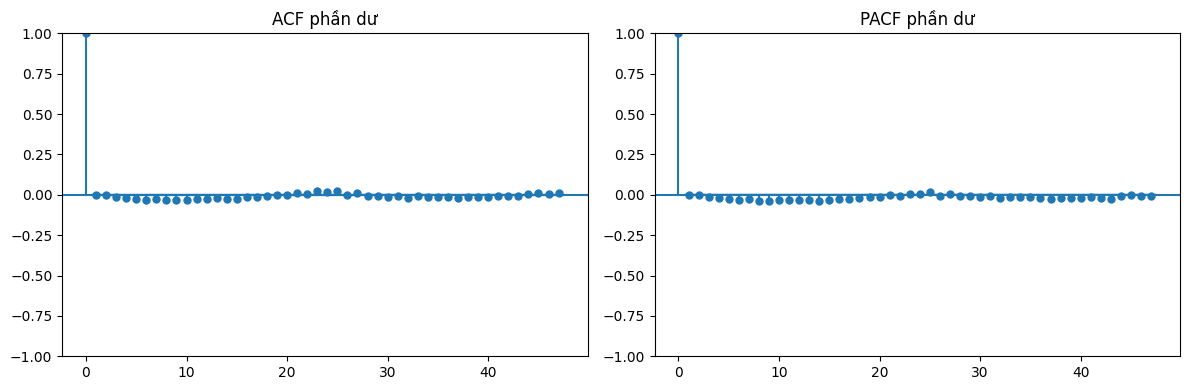

       lb_stat     lb_pvalue
20  448.442689  1.721650e-82


In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

df = pd.read_csv('PRSA_data_2010.1.1-2014.12.31.csv')
df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)

data = df['pm2.5'].fillna(df['pm2.5'].mean())

model = ARIMA(data, order=(2, 2, 1))
model_fit = model.fit()

print(model_fit.summary())

residuals = model_fit.resid

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(residuals, ax=axes[0])
axes[0].set_title("ACF phần dư")
plot_pacf(residuals, ax=axes[1])
axes[1].set_title("PACF phần dư")
plt.tight_layout()
plt.show()

residuals_clean = residuals.dropna()
ljung_result = acorr_ljungbox(residuals_clean, lags=[20], return_df=True)
print(ljung_result)